<a href="https://colab.research.google.com/github/suchetade2/AI-Driven-Banking-Campaign-Insights/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bank_marketing_dataset.csv")

In [ ]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [ ]:
binary_cols = ['housing', 'loan']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
df['credit_exposure'] = np.where(
    (df['loan'] == 'yes') | (df['housing'] == 'yes'),
    'High Credit Exposure',
    'Low Credit Exposure'
)


In [ ]:
df['credit_risk_flag'] = np.where(
    df['default'] == 'yes',
    'Previously Defaulted',
    'No Default History'
)


In [ ]:
df['engagement_level'] = pd.cut(
    df['duration'],
    bins=[-1, 100, 300, df['duration'].max()],
    labels=['Low Engagement', 'Medium Engagement', 'High Engagement']
)


In [ ]:
df['campaign_intensity'] = pd.cut(
    df['campaign'],
    bins=[0, 2, 5, df['campaign'].max()],
    labels=['Low', 'Medium', 'High']
)


In [ ]:
df['economic_environment'] = np.where(
    df['emp.var.rate'] < 0,
    'Weak Economy',
    'Stable/Strong Economy'
)


In [ ]:
df['subscription_status'] = df['subscribed'].map({
    'yes': 'Subscribed',
    'no': 'Not Subscribed'
})


In [ ]:
df[['credit_exposure',
    'credit_risk_flag',
    'engagement_level',
    'campaign_intensity',
    'economic_environment',
    'subscription_status']].head()


,credit_exposure,credit_risk_flag,engagement_level,campaign_intensity,economic_environment,subscription_status
0,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
1,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
2,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
3,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
4,Low Credit Exposure,No Default History,High Engagement,Low,Stable/Strong Economy,Not Subscribed


In [ ]:
df['credit_exposure'].value_counts()
df['engagement_level'].value_counts()
df['subscription_status'].value_counts()


,count
subscription_status,
Not Subscribed,36548
Subscribed,4640


<Axes: xlabel='subscription_status'>

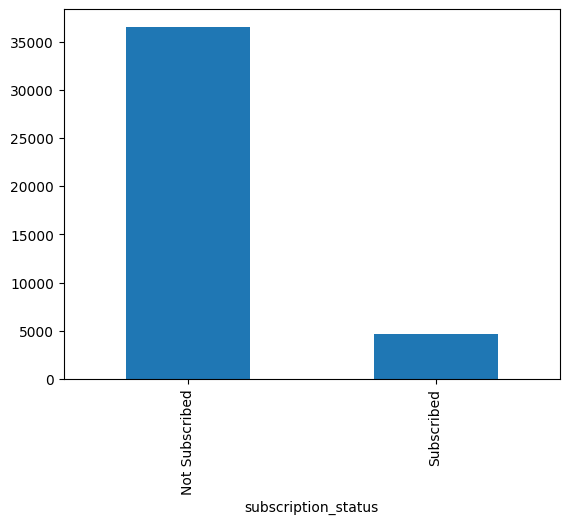

In [ ]:
df['subscription_status'].value_counts().plot(kind='bar')


<Axes: xlabel='credit_exposure'>

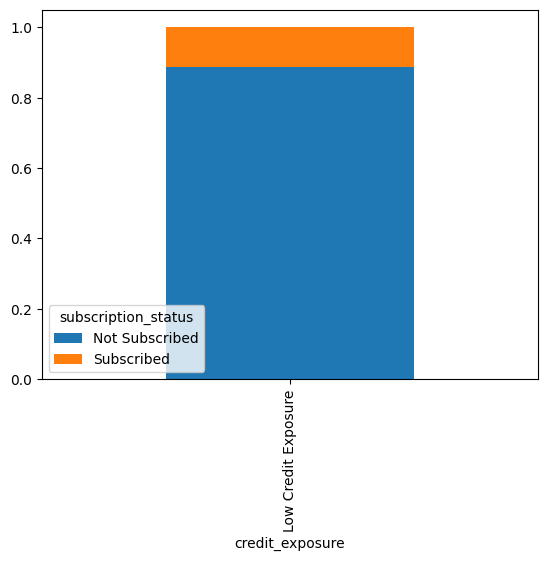

In [ ]:
pd.crosstab(df['credit_exposure'], df['subscription_status'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='engagement_level'>

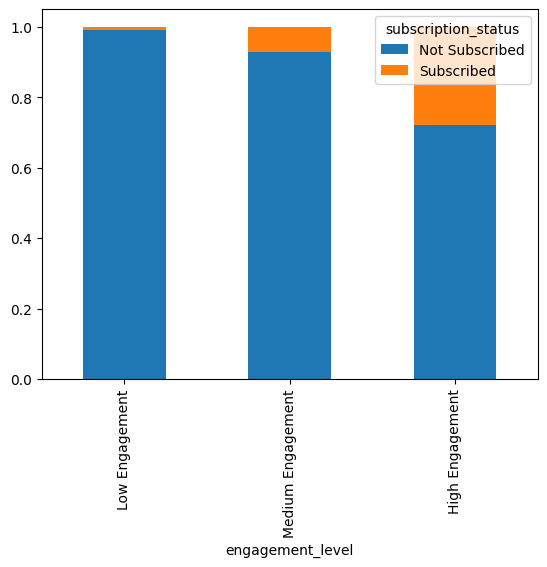

In [ ]:
pd.crosstab(df['engagement_level'], df['subscription_status'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='campaign_intensity'>

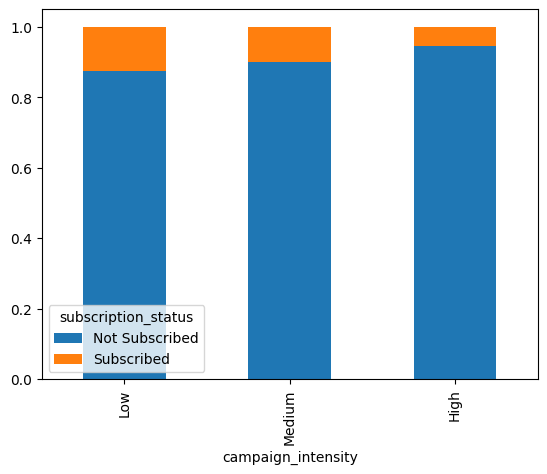

In [ ]:
pd.crosstab(df['campaign_intensity'], df['subscription_status'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='economic_environment'>

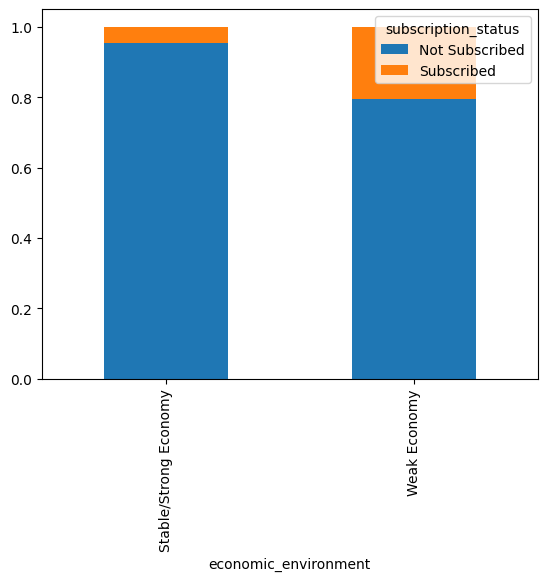

In [ ]:
pd.crosstab(df['economic_environment'], df['subscription_status'], normalize='index').plot(kind='bar', stacked=True)


<Axes: title={'center': 'age'}, xlabel='subscription_status'>

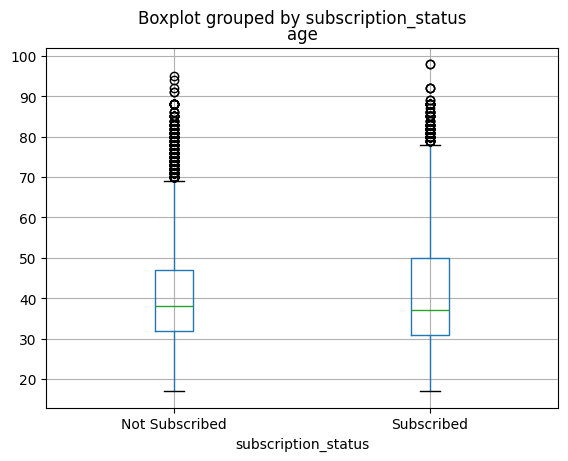

In [ ]:
df.boxplot(column='age', by='subscription_status')


<Axes: xlabel='job'>

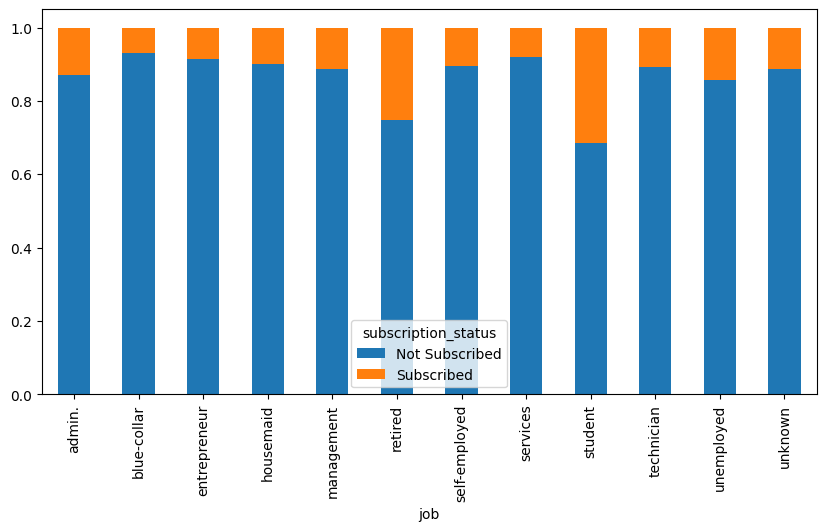

In [ ]:
pd.crosstab(df['job'], df['subscription_status'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,5))


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   41188 non-null  int64   
 1   job                   41188 non-null  object  
 2   marital               41188 non-null  object  
 3   education             41188 non-null  object  
 4   default               41188 non-null  object  
 5   housing               40198 non-null  float64 
 6   loan                  40198 non-null  float64 
 7   contact               41188 non-null  object  
 8   month                 41188 non-null  object  
 9   day_of_week           41188 non-null  object  
 10  duration              41188 non-null  int64   
 11  campaign              41188 non-null  int64   
 12  pdays                 41188 non-null  int64   
 13  previous              41188 non-null  int64   
 14  poutcome              41188 non-null  object  
 15  em

In [ ]:
new_cols = [
    'credit_exposure',
    'credit_risk_flag',
    'engagement_level',
    'campaign_intensity',
    'economic_environment',
    'subscription_status'
]

df[new_cols].head()


,credit_exposure,credit_risk_flag,engagement_level,campaign_intensity,economic_environment,subscription_status
0,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
1,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
2,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
3,Low Credit Exposure,No Default History,Medium Engagement,Low,Stable/Strong Economy,Not Subscribed
4,Low Credit Exposure,No Default History,High Engagement,Low,Stable/Strong Economy,Not Subscribed


In [ ]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
df.to_csv(
    "cleaned_bank_marketing_financial_insights.csv",
    index=False
)
